In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection  import train_test_split
import torch #python #keras #tensorflow #pytorch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import datasets
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.optim as optim


# Question 1

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


## Question 1 part 1 sigmoid function

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 =nn.Conv2d(3, 6, 5)
        self.pool =nn.MaxPool2d(2, 2)
        self.conv2 =nn.Conv2d(6, 16, 5)
        self.fc1 =  nn.Linear(16 * 5 * 5, 120)
        self.fc2 =  nn.Linear(120, 84)
        self.fc3 =nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(nn.Sigmoid()(self.conv1(x)))
        x = self.pool(nn.Sigmoid()(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = nn.Sigmoid()(self.fc1(x))
        x = nn.Sigmoid()(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model_sigmoid =NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(model_sigmoid.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_sigmoid(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / (i + 1)))
print('Finished Training')


Epoch 1 loss: 2.313
Epoch 2 loss: 2.309
Finished Training


In [ ]:
correct =0
total =0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_sigmoid(images)
        _, predicted = torch.max(outputs.data, 1)
        total +=labels.size(0)
        correct +=(predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


## Question 1 part 1 tanh

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool =nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6,16, 5)
        self.fc1 =nn.Linear(16 *5 * 5, 120)
        self.fc2 =nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(nn.Tanh()(self.conv1(x)))
        x = self.pool(nn.Tanh()(self.conv2(x)))
        x = x.view(-1,16*5* 5)
        x = nn.Tanh()(self.fc1(x))
        x = nn.Tanh()(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model_tanh = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_tanh.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2): 

    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_tanh(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch +1,running_loss/(i+1)))

print('Finished Training')


Epoch 1 loss: 1.716
Epoch 2 loss: 1.394
Finished Training


In [ ]:
# Test the model on the test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels =data
        outputs = model_tanh(images)
        _, predicted =torch.max(outputs.data, 1)
        total +=labels.size(0)
        correct +=(predicted ==labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 *correct/total))

Accuracy of the network on the 10000 test images: 53 %


##Checking Vanishing Gradient by adding FCs

### Number of layers = 3

In [ ]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 *5 *5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    def forward(self, x):
        x = self.pool(nn.Tanh()(self.conv1(x)))
        x = self.pool(nn.Tanh()(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = nn.Tanh()(self.fc1(x))
        x = nn.Tanh()(self.fc2(x))
        x = (self.fc3(x))
        return x
model_vg = DeepNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vg.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  
    print(epoch)
    running_loss =0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_vg(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss +=loss.item()
    print('Epoch %d loss: %.3f' % (epoch +1, running_loss/(i+1)))


0
Epoch 1 loss: 1.729
1
Epoch 2 loss: 1.411


In [ ]:
# Test the model on the test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels =data
        outputs =model_vg(images)
        _, predicted = torch.max(outputs.data, 1)
        total +=labels.size(0)
        correct +=(predicted ==labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


### Number of Layers -4

In [ ]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.conv1 =nn.Conv2d(3, 6, 5)
        self.pool =nn.MaxPool2d(2, 2)
        self.conv2 =nn.Conv2d(6, 16, 5)
        self.fc1 =nn.Linear(16 * 5 * 5, 120)
        self.fc2 =nn.Linear(120, 84)
        self.fc3 =nn.Linear(84, 10)
        self.fc4 =nn.Linear(10, 10)

    def forward(self, x):
        x =self.pool(nn.Tanh()(self.conv1(x)))
        x = self.pool(nn.Tanh()(self.conv2(x)))
        x =x.view(-1, 16 * 5 * 5)
        x =nn.Tanh()(self.fc1(x))
        x =nn.Tanh()(self.fc2(x))
        x =nn.Tanh(self.fc3(x))
        x = (self.fc4(x))
        return x

model_vg = DeepNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vg.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  
    print(epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs =model_vg(inputs)
        loss =criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss +=loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / (i + 1)))

0
Epoch 1 loss: 1.703
1
Epoch 2 loss: 1.391


In [ ]:
# Test the model on the test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs =model_vg(images)
        _, predicted =torch.max(outputs.data, 1)
        total += labels.size(0)
        correct +=(predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


### Number of Layers = 5

In [ ]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2= nn.Conv2d(6, 16, 5)
        self.fc1 =nn.Linear(16 * 5 * 5, 120)
        self.fc2 =nn.Linear(120, 84)
        self.fc3 =nn.Linear(84, 10)
        self.fc4 =nn.Linear(10, 10)
        self.fc5 =nn.Linear(10, 10)

    def forward(self, x):
        x =self.pool(nn.Tanh()(self.conv1(x)))
        x =self.pool(nn.Tanh()(self.conv2(x)))
        x =x.view(-1, 16 * 5 * 5)
        x = nn.Tanh()(self.fc1(x))
        x =nn.Tanh()(self.fc2(x))
        x =nn.Tanh(self.fc3(x))
        x =nn.Tanh(self.fc4(x))
        x =  (self.fc5(x))
        return x

model_vg = DeepNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vg.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  
    print(epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # print('here')
        optimizer.zero_grad()
        outputs = model_vg(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / (i + 1)))

0
Epoch 1 loss: 1.403
1
Epoch 2 loss: 1.107


In [ ]:
# Test the model on the test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # print('here')
        outputs = model_vg(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


### Number of Layers = 6

In [ ]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 =nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 =nn.Linear(84, 10)
        self.fc4 = nn.Linear(10, 10)
        self.fc5 =nn.Linear(10, 10)
        self.fc6 =nn.Linear(10, 10)
    def forward(self, x):
        x = self.pool(nn.Tanh()(self.conv1(x)))
        x = self.pool(nn.Tanh()(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x =nn.Tanh()(self.fc1(x))
        x =nn.Tanh()(self.fc2(x))
        x = self.fc3(x)
        x =nn.Tanh()(self.fc4(x))
        x = nn.Tanh()(self.fc5(x))
        x =nn.Tanh()(self.fc6(x))
        return x
model_vg6 = DeepNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vg6.parameters(), lr=0.001, momentum=0.9)

for epoch in range(3):  
    print(epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # print('here')
        optimizer.zero_grad()
        outputs = model_vg6(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / (i + 1)))


0
Epoch 1 loss: 2.083
1
Epoch 2 loss: 1.866
2
Epoch 3 loss: 1.771


In [ ]:
# Test the model on the test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs =model_vg6(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 34 %


## Overcoming vanishing gradient Using ReLU and LeakyReLU

In [ ]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 =nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 =nn.Linear(84, 10)
        self.fc4 = nn.Linear(10, 10)
        self.fc5 =nn.Linear(10, 10)
        self.fc6 =nn.Linear(10, 10)
    def forward(self, x):
        x =self.pool(nn.LeakyReLU()(self.conv1(x)))
        x =self.pool(nn.LeakyReLU()(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = nn.LeakyReLU()(self.fc1(x))
        x =nn.LeakyReLU()(self.fc2(x))
        x =self.fc3(x)
        x =nn.LeakyReLU()(self.fc4(x))
        x =nn.LeakyReLU()(self.fc5(x))
        x = (self.fc6(x))
        return x
model_vg6 = DeepNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vg6.parameters(), lr=0.001, momentum=0.9)

for epoch in range(3):  
    print(epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels =data
        optimizer.zero_grad()
        outputs = model_vg6(inputs)
        loss =criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss +=loss.item()
    print('Epoch %d loss: %.3f' % (epoch+1,running_loss/(i+1)))


0
Epoch 1 loss: 2.178
1
Epoch 2 loss: 1.789
2
Epoch 3 loss: 1.579


In [ ]:
# Test the model on the test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_vg6(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images: 46 %


##overcoming vanishing Gradient using Skip Connections and Batch Normalization

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class SkipConnection(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(SkipConnection, self).__init__()
        self.conv = nn.Conv2d(in_channels,out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn = nn.BatchNorm2d(out_channels)
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        return out
class SkipNet(nn.Module):
    def __init__(self):
        super(SkipNet, self).__init__()
        self.layer1 =SkipConnection(3, 32, stride=1)
        self.layer2 =SkipConnection(32, 64, stride=2)
        self.layer3 =SkipConnection(64, 128, stride=2)
        self.fc = nn.Linear(128*8*8, 10)
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
model = SkipNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 2
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        images = images
        labels = labels
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch+1, num_epochs, loss.item(), 100 * correct / total))

Epoch [1/2], Loss: 1.7408, Accuracy: 39.74%
Epoch [2/2], Loss: 1.5959, Accuracy: 40.85%


#Q2

In [ ]:
transform = transforms.Compose([transforms.Resize((32, 32)),
    transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train = ImageFolder('/content/drive/MyDrive/GurNum/train', transform=transform)
trainLoader = DataLoader(train, batch_size=32, shuffle=True, num_workers=2)
val = ImageFolder('/content/drive/MyDrive/GurNum/val', transform=transform)
valLoader = DataLoader(val, batch_size=32, shuffle=True, num_workers=2)


images.shape: torch.Size([32, 3, 32, 32])


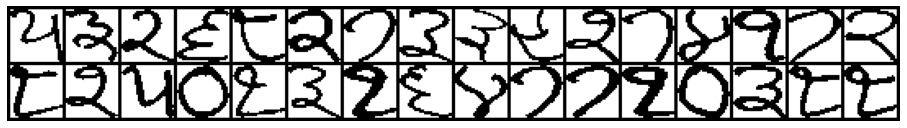

In [ ]:
for images, _ in trainLoader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

images.shape: torch.Size([32, 3, 32, 32])


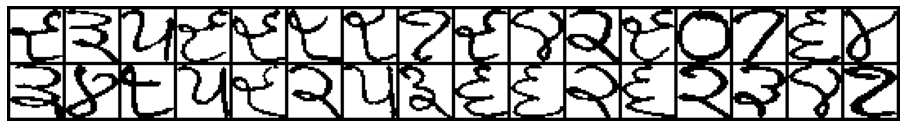

In [ ]:
for images, _ in valLoader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

CNN architecture of 2 FCs used in L1 and L2 regularization\

In [ ]:
class Net_reg(nn.Module):
    def __init__(self):
        super(Net_reg, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 =nn.Linear(64 * 8 * 8, 256)
        self.fc2 =nn.Linear(256, 10)
    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

defining model

In [ ]:
criterion = nn.CrossEntropyLoss()
net = Net_reg()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Training for L1

In [ ]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        # print('here')
        loss = criterion(outputs, labels)
        l1_regularization = 0   #L1
        for param in  net.parameters():
            l1_regularization += torch.sum(torch.abs(param))
        loss += 0.01 * l1_regularization
        loss.backward()
        optimizer.step()

Testing for L1

In [ ]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct =0
    with torch.no_grad():
        for data, target in test_loader:
            # data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))
test(net,valLoader,criterion)


Test set: Average loss: 0.0083, Accuracy: 161/178 (91%)


Training for L2

In [ ]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs =net(inputs)
        loss = criterion(outputs, labels)
        
        l2_regularization = 0
        for param in  net.parameters():
            # print('here')
            l2_regularization += torch.sum(param ** 2)
        loss += 0.001 * l2_regularization
        
        loss.backward()
        optimizer.step()


Testing for L2

In [ ]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            # print('here')
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))
test(net,valLoader,criterion)


Test set: Average loss: 0.0072, Accuracy: 167/178 (93%)


Model for dropout architecture

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.25)
    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x =nn.functional.max_pool2d(x, 2, 2)
        x =nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x =x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

Model Definition

In [ ]:
criterion = nn.CrossEntropyLoss()
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


Training the model

In [ ]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # print('here')
        # # Add L1 regularization term to the loss
        # l1_regularization = 0
        # for Parameters net.parameters():
        #     l1_regularization += torch.sum(param ** 2)
        # loss += 0.001 * l1_regularization
        
        loss.backward()
        optimizer.step()


Testing

In [ ]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            # print('here')
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))
test(net,valLoader,criterion)


Test set: Average loss: 0.0046, Accuracy: 171/178 (96%)



In [ ]:
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
import torch
import numpy as np

def compute_numerical_gradient(net, x, y, h=1e-5):
    tensor = torch.empty_like(x)
    tensor.requires_grad = True
    criterion = torch.nn.CrossEntropyLoss()
    loss = criterion(net(tensor), y)
    loss.backward()
    grad = tensor.grad.data.numpy().flatten()
    numerical_grad = np.zeros_like(grad)
    for i in range(len(grad)):
        tensor.grad.zero_()
        tensor[i] =x[i] + h
        loss_plus = criterion(net(tensor), y)
        tensor[i] =x[i] - h
        loss_minus = criterion(net(tensor), y)
        numerical_grad[i] = (loss_plus - loss_minus) / (2 * h)
        tensor[i] = x[i]
    return numerical_grad

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
criterion = nn.CrossEntropyLoss()


In [ ]:
def gradient_checking(net, x,y, epsilon=1e-6):

    grads = compute_numerical_gradient(net, x, y)
    for i, (param, grad) in enumerate(zip(net.parameters(), grads)):
        param_data = param.data.numpy().reshape(-1)
        grad_data = grad.data.numpy().reshape(-1)
        for j in range(len(param_data)):
            old_param = param_data[j]
            param_data[j] = old_param + epsilon
            loss_plus = criterion(net(x), y).data.numpy()
            param_data[j] = old_param - epsilon
            loss_minus = criterion(net(x), y).data.numpy()
            param_data[j] = old_param
            numerical_grad = (loss_plus - loss_minus) / (2 * epsilon)
            backprop_grad = grad_data[j]
            rel_error = abs(numerical_grad - backprop_grad) / (abs(numerical_grad) + abs(backprop_grad))
            if rel_error > 1e-5:
                print("Gradient checking failed for parameter ", i, " with index ", j)
                print("Numerical grad: ", numerical_grad)
                print("Backprop grad: ", backprop_grad)
                print("Relative error: ", rel_error)

In [ ]:
input_batch, label_batch = next(iter(trainLoader))

In [ ]:
gradient_checking(net,input_batch, label_batch)

In [ ]:
compare_gradients(net,input_batch)